Paper plots comparing the performance of the CNN vs. Melodia and Juanjo's melody systems on Melody2.
A clown mock of the pointwise track differences in performance at the bottom.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
%matplotlib inline

In [2]:
def get_dfbox(metrics):
    df_melodia = pd.DataFrame.from_csv("../outputs/Melodia_scores.csv")
    df_bosch = pd.DataFrame.from_csv("../outputs/juanjo_mdb_scores.csv")
    df_cnn = pd.DataFrame.from_csv("../outputs/CNNmel2_argmax_scores.csv")
    
    boxdata = []
    for metric in metrics:
        boxdata.extend([
            df_melodia[metric],
            df_bosch[metric],
            df_cnn[metric]
        ])

    dfbox = pd.DataFrame(np.array(boxdata).T)
    return dfbox

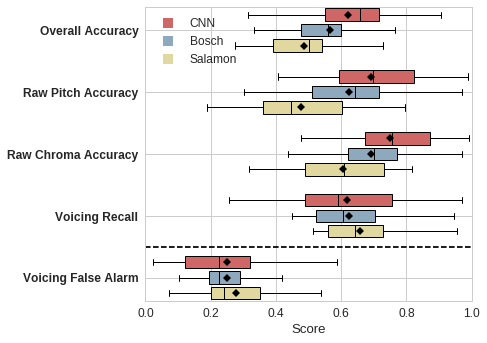

In [3]:
fig = plt.figure(figsize=(7, 5))
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
metrics = ['Voicing False Alarm', 'Voicing Recall', 'Raw Chroma Accuracy', 'Raw Pitch Accuracy', 'Overall Accuracy']
data_df = get_dfbox(metrics)

n_algs = 3
n_metrics = len(metrics)
positions = []
k = 1
for i in range(n_metrics):
    for j in range(n_algs):
        positions.append(k)
        k = k + 1
    k = k + 1

current_palette = ["#E1D89F", "#8EA8BD", "#CF6766"]
colors = current_palette*n_metrics

box = plt.boxplot(
    data_df.values, widths=0.8, positions=positions,
    patch_artist=True, showmeans=True,
    medianprops={'color': 'k'},
    meanprops=dict(marker='D', markeredgecolor='black',
        markerfacecolor='k'),
    vert=False
)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

show_yaxis = True
xlim = [0, 1]
legend_loc = 2

plt.xlabel('Score')
if show_yaxis:
    plt.yticks(np.arange(2, 4*(n_metrics + 1) - 2, 4), metrics, rotation='horizontal', weight='bold')
else:
    plt.yticks(np.arange(2, 4*(n_metrics + 1) - 2, 4), ['']*len(metrics), rotation='horizontal')

plt.plot([0, 1], [4, 4], '--', color='k')
    
if xlim is not None:
    plt.xlim(xlim)

if legend_loc is not None:
    # draw temporary red and blue lines and use them to create a legend
    h_benetos, = plt.plot([1,1],'s',color=colors[0], markersize=10)
    h_duan, = plt.plot([1,1],'s',color=colors[1], markersize=10)
    h_cnn, = plt.plot([1,1],'s',color=colors[2], markersize=10)
    lgd = plt.legend((h_cnn, h_duan, h_benetos),('CNN', 'Bosch', 'Salamon'), ncol=1, loc=legend_loc)

    h_benetos.set_visible(False)
    h_duan.set_visible(False)
    h_cnn.set_visible(False)

plt.tight_layout()
plt.savefig("../paper-figs/all_melody_scores.pdf", format='pdf', bbox_inches='tight')

In [4]:
df_melodia = pd.DataFrame.from_csv("../outputs/Melodia_scores.csv")
df_bosch = pd.DataFrame.from_csv("../outputs/juanjo_mdb_scores.csv")
df_cnn = pd.DataFrame.from_csv("../outputs/CNNmel2_argmax_scores.csv")

metric = 'Overall Accuracy'
cnn_accuracy = df_cnn[metric]
bosch_accuracy = df_bosch[metric]
salamon_accuracy = df_melodia[metric]

In [5]:
tracks = [
    'AClassicEducation_NightOwl',
    'Auctioneer_OurFutureFaces',
    'CelestialShore_DieForUs',
    'ChrisJacoby_BoothShotLincoln',
    'ChrisJacoby_PigsFoot',
    'Creepoid_OldTree',
    'Debussy_LenfantProdigue',
    'MatthewEntwistle_DontYouEver',
    'MatthewEntwistle_FairerHopes',
    'MatthewEntwistle_ImpressionsOfSaturn',
    'MatthewEntwistle_Lontano',
    'MatthewEntwistle_TheArch',
    'MatthewEntwistle_TheFlaxenField',
    'Mozart_DiesBildnis',
    'MusicDelta_FusionJazz',
    'MusicDelta_Gospel',
    'MusicDelta_Pachelbel',
    'MusicDelta_SwingJazz',
    'Phoenix_BrokenPledgeChicagoReel',
    'Phoenix_ColliersDaughter',
    'Phoenix_ElzicsFarewell',
    'Phoenix_LarkOnTheStrandDrummondCastle',
    'Phoenix_ScotchMorris',
    'Phoenix_SeanCaughlinsTheScartaglen',
    'PortStWillow_StayEven',
    'Schubert_Erstarrung',
    'StrandOfOaks_Spacestation'
]

([<matplotlib.axis.XTick at 0x2ae3f4da3050>,
 <a list of 27 Text xticklabel objects>)

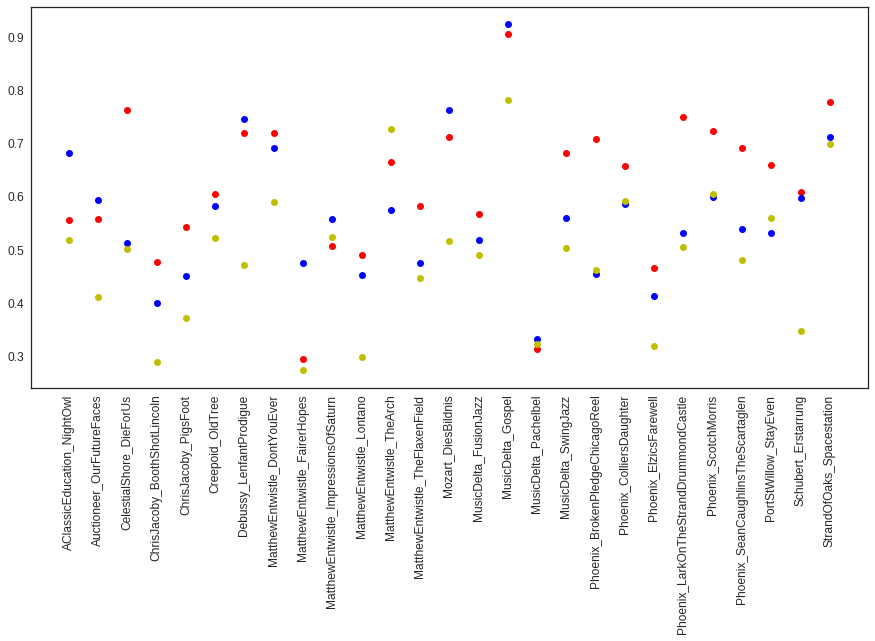

In [6]:
plt.figure(figsize=(15, 7))
sns.set_style('white')
plt.plot(cnn_accuracy, 'or')
plt.plot(bosch_accuracy, 'ob')
plt.plot(salamon_accuracy, 'oy')
plt.xticks(range(len(tracks)), tracks, rotation='vertical')

([<matplotlib.axis.XTick at 0x2ae3f613c5d0>,
 <a list of 27 Text xticklabel objects>)

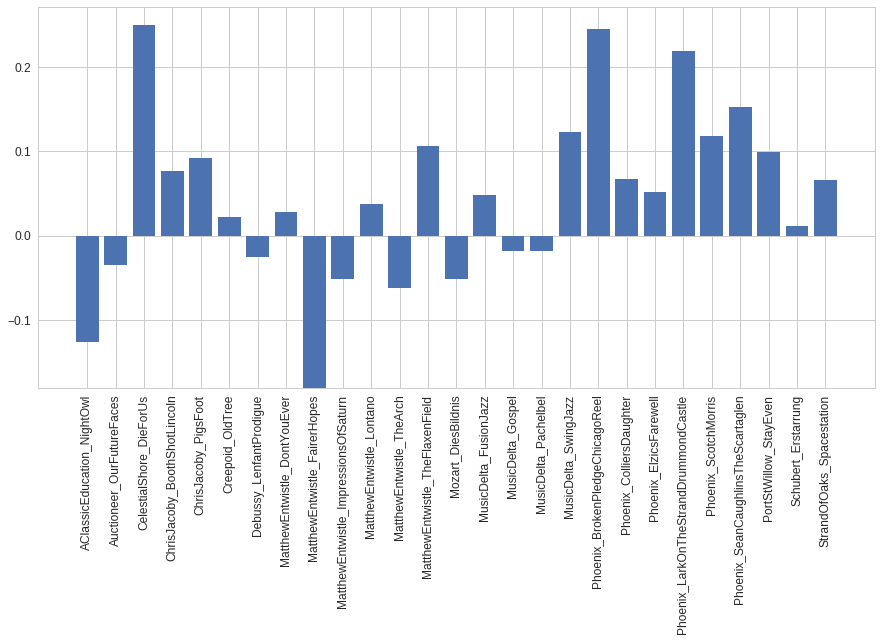

In [12]:
plt.figure(figsize=(15, 7))
sns.set_style('whitegrid')
plt.bar(range(len(cnn_accuracy)), cnn_accuracy - np.max([bosch_accuracy, salamon_accuracy], axis=0))
# plt.plot(bosch_accuracy, 'ob')
# plt.plot(salamon_accuracy, 'oy')
plt.xticks(range(len(tracks)), tracks, rotation='vertical')

In [13]:
df_melodia.describe()

,Overall Accuracy,Raw Chroma Accuracy,Raw Pitch Accuracy,Voicing False Alarm,Voicing Recall
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.486868,0.606311,0.476008,0.279246,0.656784
std,0.131669,0.143511,0.175466,0.116110,0.118474
min,0.274357,0.318569,0.188048,0.071076,0.512599
25%,0.392054,0.489597,0.360232,0.201246,0.559849
50%,0.501646,0.608443,0.446496,0.242126,0.643363
75%,0.542334,0.729911,0.601873,0.351802,0.726949
max,0.782555,0.817234,0.793903,0.539543,0.955698


In [14]:
df_bosch.describe()

,Overall Accuracy,Raw Chroma Accuracy,Raw Pitch Accuracy,Voicing False Alarm,Voicing Recall
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.565634,0.691321,0.623177,0.248677,0.623546
std,0.127208,0.126337,0.149370,0.097572,0.125776
min,0.333819,0.438441,0.303735,0.101989,0.450803
25%,0.476282,0.622277,0.510344,0.195668,0.521752
50%,0.559132,0.700759,0.643358,0.225763,0.606613
75%,0.598104,0.769768,0.716211,0.291395,0.704172
max,0.923737,0.970084,0.969399,0.459128,0.945764


In [15]:
df_cnn.describe()

,Overall Accuracy,Raw Chroma Accuracy,Raw Pitch Accuracy,Voicing False Alarm,Voicing Recall
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.619314,0.750617,0.691730,0.249080,0.617043
std,0.137896,0.128677,0.150087,0.152424,0.191002
min,0.295744,0.476139,0.407495,0.022636,0.254947
25%,0.550730,0.672693,0.593381,0.121165,0.488187
50%,0.658842,0.756113,0.696187,0.226346,0.590531
75%,0.715929,0.871733,0.821644,0.319162,0.756039
max,0.905112,0.990066,0.989609,0.587044,0.968600
